Importation des librairies

In [47]:
import pyodbc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Importation du jeu de données et création du dataframe pandas

In [48]:
df = pd.read_csv('conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-departement.csv', sep=';')
df

,Opérateur,Année,Filière,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),...,Nombre de points Secteur Inconnu,Nombre de mailles secretisées (secteur inconnu),Indice qualité Non Affecté,Code Département,Libellé Département,Code Région,Libellé Région,id_filiere,geom,Consommation totale (MWh)
0,Centrale électrique Vonderscheer de Ville,2011,Electricité,0.00,0,0,0.000,271.000000,4,0,...,0,0,0.000,67,Bas-Rhin,44,Grand Est,100,NaN,6.483000e+03
1,Coopérative d'électricité de Saint Martin de L...,2011,Electricité,1414.68,22,0,1.000,15865.010000,66,0,...,17,0,1.000,34,Hérault,76,Occitanie,100,NaN,3.370420e+05
2,Enedis,2011,Electricité,6496.52,70,0,0.934,510119.990000,501,0,...,24,0,0.930,08,Ardennes,44,Grand Est,100,NaN,1.522084e+06
3,Enedis,2011,Electricité,12493.80,127,0,0.887,318256.950000,575,0,...,42,0,0.821,12,Aveyron,76,Occitanie,100,NaN,1.597746e+06
4,Enedis,2011,Electricité,62161.03,1231,0,0.978,292151.220000,791,0,...,93,0,0.707,17,Charente-Maritime,75,Nouvelle-Aquitaine,100,NaN,3.610476e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,Teréga,2021,Gaz,0.00,0,0,0.000,760336.995546,9,0,...,0,0,0.000,31,Haute-Garonne,76,Occitanie,200,NaN,7.795957e+05
5588,Teréga,2021,Gaz,0.00,0,0,0.000,0.000000,0,0,...,0,0,0.000,32,Gers,76,Occitanie,200,NaN,1.994014e+04
5589,Teréga,2021,Gaz,0.00,0,0,0.000,475931.741596,5,0,...,0,0,0.000,65,Hautes-Pyrénées,76,Occitanie,200,NaN,4.895949e+05
5590,Teréga,2021,Gaz,0.00,0,0,0.000,14183.098430,1,0,...,0,0,0.000,82,Tarn-et-Garonne,76,Occitanie,200,NaN,5.131441e+04


Visualisation de la structure du dataframe

In [49]:
# nombre de lignes et nombre de colonnes

df.shape

(5592, 30)

In [50]:
# structure du dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Opérateur                                        5592 non-null   object 
 1   Année                                            5592 non-null   int64  
 2   Filière                                          5592 non-null   object 
 3   Consommation Agriculture (MWh)                   5592 non-null   float64
 4   Nombre de points Agriculture                     5592 non-null   int64  
 5   Nombre de mailles secretisées (agriculture)      5592 non-null   int64  
 6   Indique qualité Agriculture                      5592 non-null   float64
 7   Consommation Industrie (MWh)                     5592 non-null   float64
 8   Nombre de points Industrie                       5592 non-null   int64  
 9   Nombre de mailles secretisées 

Préparation du jeu de données

In [51]:
# supression de la colonne vide

df = df.drop('geom', axis=1)

In [52]:
# création de dictionnaires de mappage pour transformer en champs quantitatifs les champs qualitatifs

Operateur_to_int = {Operateur: i for i, Operateur in enumerate(df['Opérateur'].unique())}
Filiere_to_int = {Filiere: i for i, Filiere in enumerate(df['Filière'].unique())}
Departement_to_int = {Departement: i for i, Departement in enumerate(df['Libellé Département'].unique())}
Region_to_int = {Region: i for i, Region in enumerate(df['Libellé Région'].unique())}

df['Operateur_id'] = df['Opérateur'].map(Operateur_to_int)
df['Filiere_id'] = df['Filière'].map(Filiere_to_int)
df['Departement_id'] = df['Libellé Département'].map(Departement_to_int)
df['Region_id'] = df['Libellé Région'].map(Region_to_int)

In [53]:
# suppression des colonnes non nécessaires

df = df.drop('Opérateur', axis=1)
df = df.drop('Filière', axis=1)
df = df.drop('Code Département', axis=1)
df = df.drop('Libellé Département', axis=1)
df = df.drop('Code Région', axis=1)
df = df.drop('Libellé Région', axis=1)

In [54]:
# affichage du jeu de données

df.head(20)

,Année,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),Indice qualité Industrie,Consommation Tertiaire (MWh),...,Consommation Secteur Inconnu (MWh),Nombre de points Secteur Inconnu,Nombre de mailles secretisées (secteur inconnu),Indice qualité Non Affecté,id_filiere,Consommation totale (MWh),Operateur_id,Filiere_id,Departement_id,Region_id
0,2011,0.00,0,0,0.000,271.00,4,0,1.000,850.00,...,0.00,0,0,0.000,100,6483.00,0,0,0,0
1,2011,1414.68,22,0,1.000,15865.01,66,0,1.000,61451.25,...,826.39,17,0,1.000,100,337042.00,1,0,1,1
2,2011,6496.52,70,0,0.934,510119.99,501,0,0.967,232299.15,...,84.85,24,0,0.930,100,1522083.89,2,0,2,0
3,2011,12493.80,127,0,0.887,318256.95,575,0,0.944,287100.16,...,590.80,42,0,0.821,100,1597746.00,2,0,3,1
4,2011,62161.03,1231,0,0.978,292151.22,791,0,0.943,769707.59,...,2141.38,93,0,0.707,100,3610475.52,2,0,4,2
5,2011,33893.43,451,0,0.969,293813.73,469,0,0.944,386840.56,...,106.04,10,0,0.684,100,1786679.32,2,0,5,3
6,2011,6393.27,38,0,0.880,704915.17,1037,0,0.950,635650.46,...,10108.56,63,0,0.632,100,2858065.62,2,0,6,4
7,2011,264923.94,995,0,0.919,857688.07,1014,0,0.958,1117773.65,...,1825.65,79,0,0.709,100,5115835.80,2,0,7,5
8,2011,28112.74,265,0,0.953,440372.86,786,0,0.955,774742.09,...,1732.04,43,0,0.642,100,3743128.03,2,0,8,1
9,2011,147931.52,885,0,0.879,857039.39,1536,0,0.911,2046998.44,...,3847.69,159,0,0.851,100,7708490.70,2,0,9,2


In [55]:
# affichage de la structure du jeu de données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Année                                            5592 non-null   int64  
 1   Consommation Agriculture (MWh)                   5592 non-null   float64
 2   Nombre de points Agriculture                     5592 non-null   int64  
 3   Nombre de mailles secretisées (agriculture)      5592 non-null   int64  
 4   Indique qualité Agriculture                      5592 non-null   float64
 5   Consommation Industrie (MWh)                     5592 non-null   float64
 6   Nombre de points Industrie                       5592 non-null   int64  
 7   Nombre de mailles secretisées (industrie)        5592 non-null   int64  
 8   Indice qualité Industrie                         5592 non-null   float64
 9   Consommation Tertiaire  (MWh) 

Etude des corrélations entre les variables

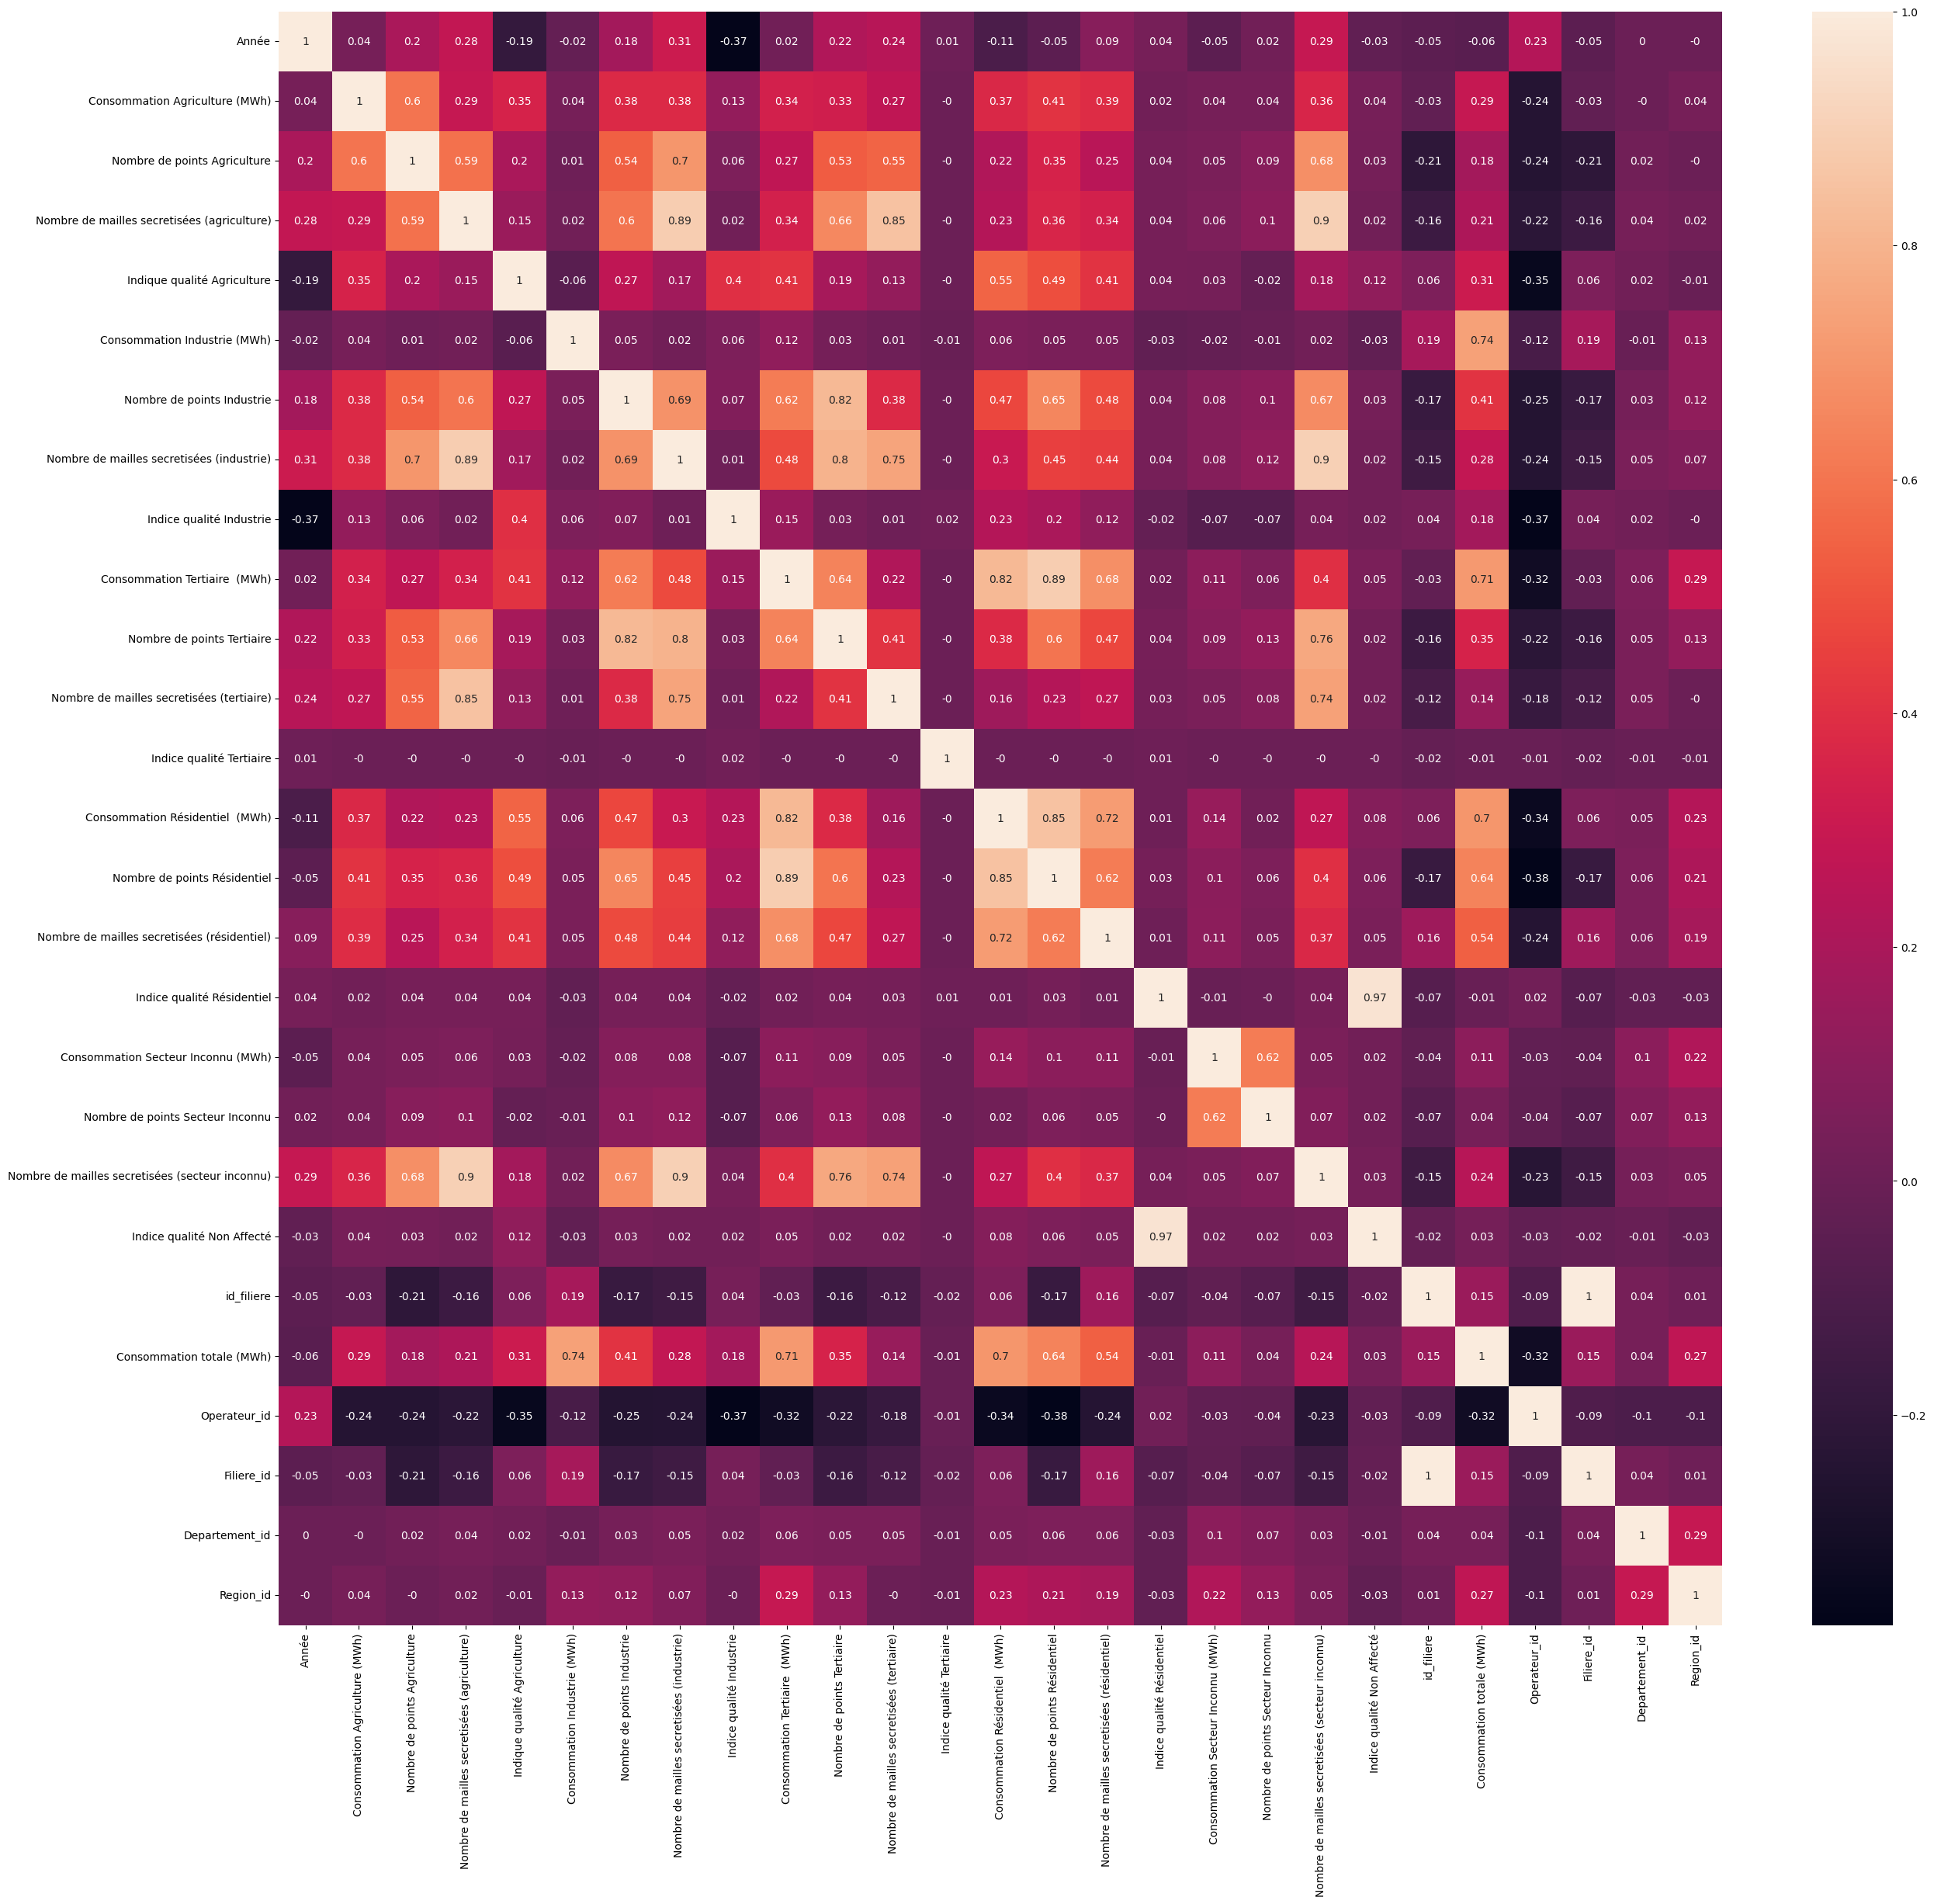

In [56]:
# matrice des corrélations

matrice_correlation = df.corr().round(2)

# tracé de la matrice

fig, ax = plt.subplots(figsize=(30, 27))
sns.heatmap(data=matrice_correlation, annot=True, ax=ax)
plt.show()